# Principal Component Analysis

### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Dataset
dataset = pd.read_csv('C:/Users/Acer/Desktop/PythonNotes/Python/DataSetsPython/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

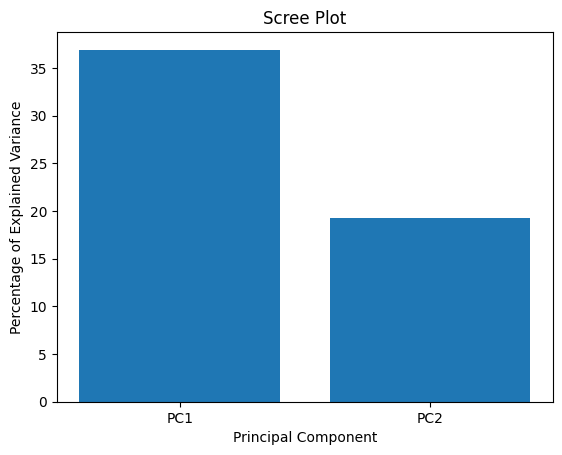

In [7]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels= ['PC' + str(i) for i in range (1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Training the Logistic Regression model on the Training set

In [3]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Making the Confusion Matrix

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

### Visualising the Training set results

C:\Users\Acer\AppData\Local\Temp\ipykernel_18868\3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


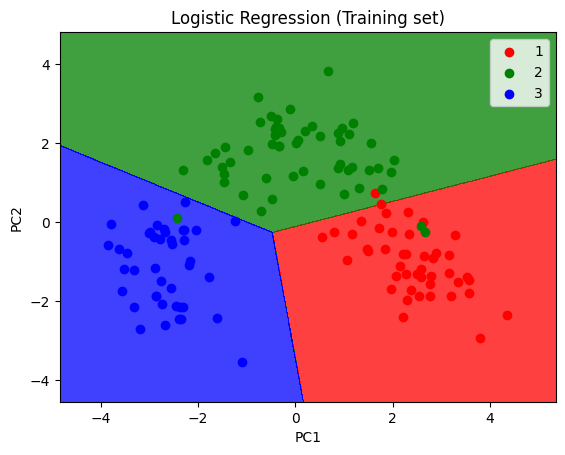

In [5]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualising the Test set results

C:\Users\Acer\AppData\Local\Temp\ipykernel_18868\3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


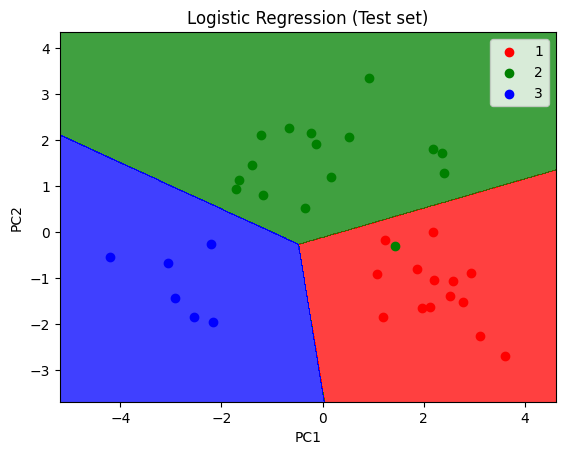

In [6]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Making a single prediction

In [8]:
new_data = np.array([[14, 2, 2, 11, 130, 3, 3, 0.3, 2, 6, 1, 3, 1000]])
# Scale the new data
new_data_scaled = sc.transform(new_data)
# Apply PCA
new_data_pca = pca.transform(new_data_scaled)
# Predict the class
prediction = classifier.predict(new_data_pca)
print("Predicted class:", prediction)

Predicted class: [1]


### Feature influence to each component

In [9]:
# Load the original dataset to get the feature names
features = dataset.iloc[:, :-1].columns

# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to display the loadings for each principal component
loadings_df = pd.DataFrame(loadings, columns=features, index=['PC1', 'PC2'])

# Display the loadings
loadings_df


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.129600,-0.244641,-0.010189,-0.240516,0.126495,0.389441,0.427578,-0.305057,0.307753,-0.110272,0.307105,0.376362,0.281109
PC2,-0.498073,-0.231685,-0.314969,0.023218,-0.258420,-0.100685,-0.020980,-0.039906,-0.067460,-0.530871,0.271617,0.160712,-0.365473


These loadings reflect the correlation of each original feature with the principal components. Features with high absolute values in a principal component are the ones that contribute the most to the variance captured by that component.

Influence in absolute value by descendent order

In [14]:
# Sorting the loadings for each principal component from strongest to weakest relationship,
# maintaining the sign for negative loadings

sorted_loadings_pc1 = loadings_df.loc['PC1'].sort_values(key=abs, ascending=False)
sorted_loadings_pc2 = loadings_df.loc['PC2'].sort_values(key=abs, ascending=False)

# Create a DataFrame to display the sorted loadings
sorted_loadings_df = pd.DataFrame({
    "PC1 Features": sorted_loadings_pc1.index,
    "PC1 Loadings": sorted_loadings_pc1.values,
    "PC2 Features": sorted_loadings_pc2.index,
    "PC2 Loadings": sorted_loadings_pc2.values
})

# Display the sorted loadings
sorted_loadings_df


,PC1 Features,PC1 Loadings,PC2 Features,PC2 Loadings
0,Flavanoids,0.427578,Color_Intensity,-0.530871
1,Total_Phenols,0.389441,Alcohol,-0.498073
2,OD280,0.376362,Proline,-0.365473
3,Proanthocyanins,0.307753,Ash,-0.314969
4,Hue,0.307105,Hue,0.271617
5,Nonflavanoid_Phenols,-0.305057,Magnesium,-0.258420
6,Proline,0.281109,Malic_Acid,-0.231685
7,Malic_Acid,-0.244641,OD280,0.160712
8,Ash_Alcanity,-0.240516,Total_Phenols,-0.100685
9,Alcohol,0.129600,Proanthocyanins,-0.067460


# Linear Discriminant Analysis

### Data Preprocessing

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Dataset
dataset = pd.read_csv('C:/Users/Acer/Desktop/PythonNotes/Python/DataSetsPython/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### Training the Logistic Regression model on the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### Visualising the Training set results

C:\Users\Acer\AppData\Local\Temp\ipykernel_18868\253029307.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


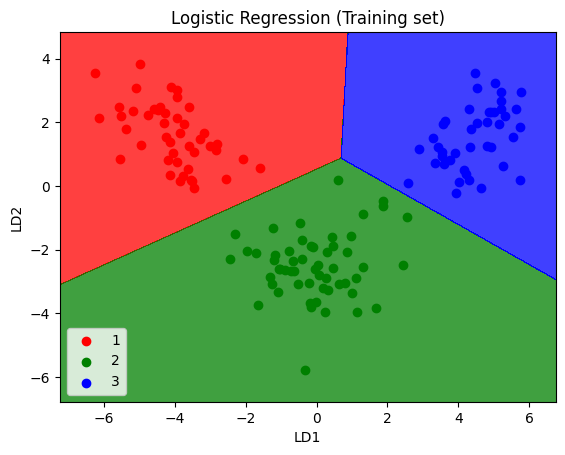

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

### Visualising the Test set results

C:\Users\Acer\AppData\Local\Temp\ipykernel_18868\464335527.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


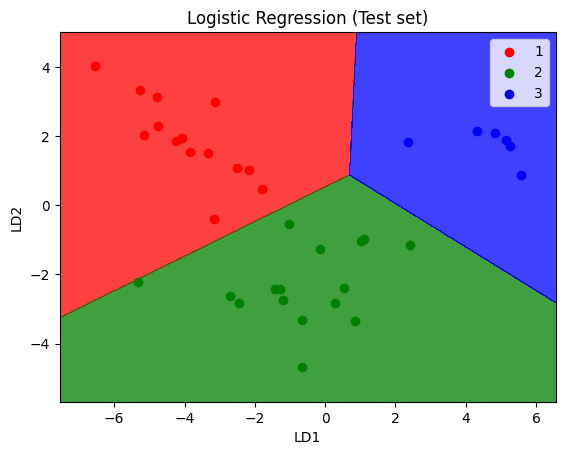

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()